#特徴量と目的関数の可視化

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64


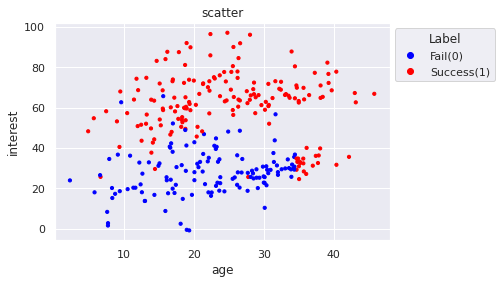

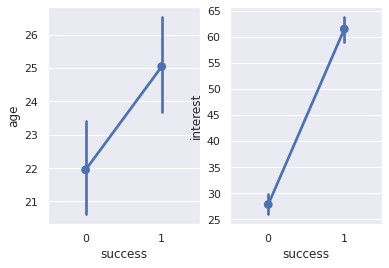

In [7]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font='IPAexGothic')
colors = {0:'Blue', 1:'red'}
plt.scatter(data["age"].astype(float),data["interest"].astype(float),c=data["success"].map(colors),s=10)

plt.title("scatter")
plt.xlabel('age')
plt.ylabel('interest')

legend = [plt.plot([], [], marker='o', ls='', color=colors[i], label=l)[0] for i, l in enumerate(['Fail(0)', 'Success(1)'])]
plt.legend(handles=legend, title='Label', loc='upper left', bbox_to_anchor=(1,1))


fig, axs = plt.subplots(nrows=1, ncols=2)
for f, ax in zip(data.columns, axs.ravel()):
  sns.pointplot(x=data['success'].astype(int),y=data[f].astype(float),data=data,ax = ax)


plt.show()

#ロジスティック回帰

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64
test score(ロジスティック回帰) :  0.865
200 問中 173 問正解


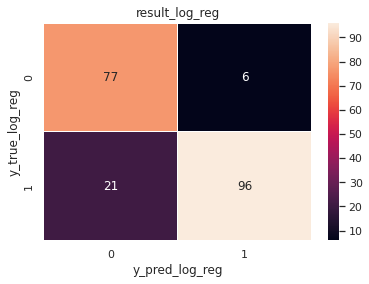

In [ ]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())


y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)
log_reg.fit(x_train, y_train)#学習
#print('train score : ', log_reg.score(x_train, y_train))
print('test score(ロジスティック回帰) : ', log_reg.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * log_reg.score(x_test, y_test)),'問正解')

#可視化(ロジスティック)
from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(x_test)
y_true_log_reg = y_test
cm_log_reg = confusion_matrix(y_true_log_reg, y_pred_log_reg)
sns.heatmap(cm_log_reg,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_log_reg")
plt.xlabel("y_pred_log_reg")
plt.ylabel("y_true_log_reg")
plt.show()

#RFC(Random Forest Classifier)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64
test score(RFC) :  0.91
200 問中 182 問正解


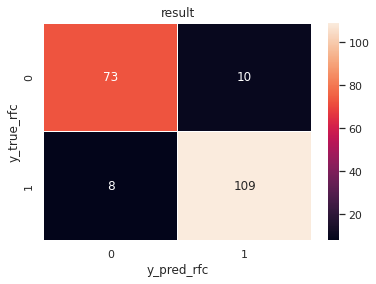

In [ ]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())


y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#RFC
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)#学習
#print('train score : ', RFC.score(x_train, y_train))
print('test score(RFC) : ', RFC.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * RFC.score(x_test, y_test)),'問正解')

#可視化(RFC)
from sklearn.metrics import confusion_matrix
y_pred_rfc = RFC.predict(x_test)
y_true_rfc = y_test
cm_rfc = confusion_matrix(y_true_rfc, y_pred_rfc)
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result")
plt.xlabel("y_pred_rfc")
plt.ylabel("y_true_rfc")
plt.show()

#決定木

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64
test score(決定木) :  0.915
200 問中 183 問正解


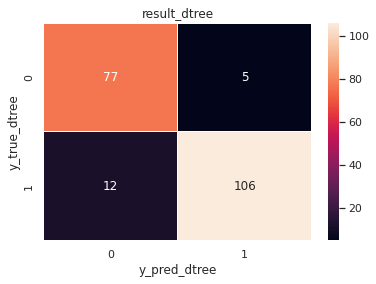

In [ ]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())


y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 決定木
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)#学習
#print('train score : ', dtree.score(x_train, y_train))
print('test score(決定木) : ', dtree.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * dtree.score(x_test, y_test)),'問正解')

#可視化(決定木)
from sklearn.metrics import confusion_matrix
y_pred_dtree = dtree.predict(x_test)
y_true_dtree = y_test
cm_dtree = confusion_matrix(y_true_dtree, y_pred_dtree)
sns.heatmap(cm_dtree,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_dtree")
plt.xlabel("y_pred_dtree")
plt.ylabel("y_true_dtree")
plt.show()

#KNN(教師あり)  
※K-meansは正解ラベルがない時(教師なし学習)に使用するので今回は使用しない。

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64
max_Indexは、 [5]
max_accuracyは、 0.91


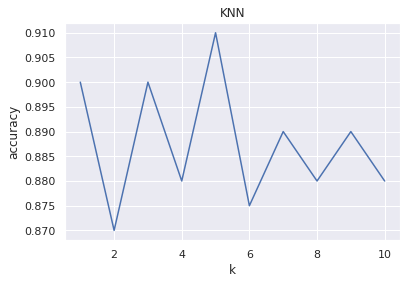

In [ ]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())

y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
scaler.fit(x_train)

list_k =[]
list_ac = []

#Kがどの値だとaccuracyが最も高いのかを確かめたい
for k in range(1,11):#kは1~
    knn = KNeighborsClassifier(n_neighbors=k)
    #transformで標準化を実際に行い、そのデータに対してサポートベクターマシンによる学習を行う
    knn.fit(scaler.transform(x_train), y_train)
    y_pred = knn.predict(scaler.transform(x_test))
    accuracy = accuracy_score(y_test,y_pred)
    
    #各kとそのときの正解率をリストに追加。後で図示のために利用。
    list_k.append(k)
    list_ac.append(accuracy)

#簡易的な図示    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("KNN")
ax.set_xlabel("k")
ax.set_ylabel("accuracy")
ax.plot(list_k, list_ac)
# 正解率が最大となるインデックスを求める.enumerateはインデックスと値のセット。
# iがインデックスでxが正解率。xが最大のときのインデックスのリスト。
maxIndex = [i+1 for i, x in enumerate(list_ac) if x == max(list_ac)]
print("max_Indexは、",maxIndex)
print("max_accuracyは、",max(list_ac))

#SVC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64
test score(svc) :  0.86
200 問中 172 問正解


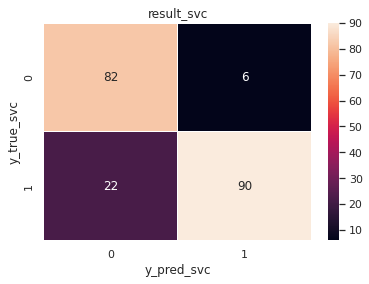

In [ ]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())


y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)#学習
#print('train score : ', svc.score(x_train, y_train))
print('test score(svc) : ', svc.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * svc.score(x_test, y_test)),'問正解')

#可視化(SVC)
from sklearn.metrics import confusion_matrix
y_pred_svc = svc.predict(x_test)
y_true_svc = y_test
cm_svc = confusion_matrix(y_true_svc, y_pred_svc)
sns.heatmap(cm_svc,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_svc")
plt.xlabel("y_pred_svc")
plt.ylabel("y_true_svc")
plt.show()